In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

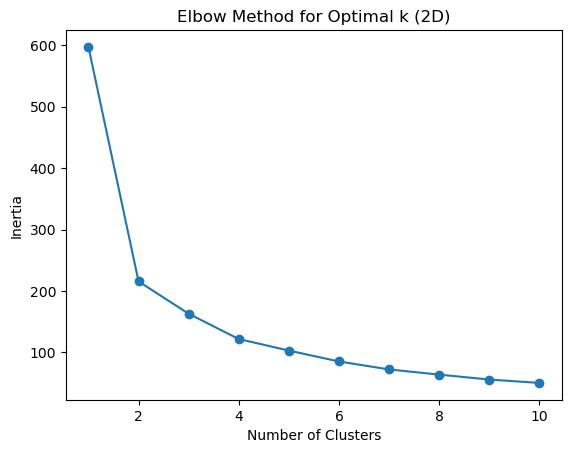

In [ ]:
# 2-D датасет
path_2d = "/Users/vika/Desktop/data_2d.csv"
data_2d = pd.read_csv(path_2d)

scaler_2d = StandardScaler()
data_2d_scaled = scaler_2d.fit_transform(data_2d)

# Ліктевий метод
inertia_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_2d_scaled)
    inertia_2d.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_2d, marker='o')
plt.title('Elbow Method for Optimal k (2D)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters_2d = int(input("Enter the optimal number of clusters for 2D dataset: "))

kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, n_init=10, random_state=42)
kmeans_2d.fit(data_2d_scaled)
labels_2d = kmeans_2d.labels_
centroids_2d = kmeans_2d.cluster_centers_

print("Labels (2D):", labels_2d)
print("Centroids (2D):", centroids_2d)

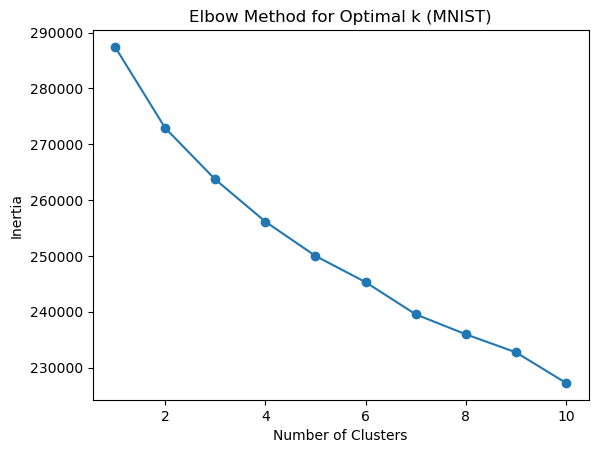

Enter the optimal number of clusters for MNIST dataset: 3

Results for MNIST dataset:
     Labels  Centroid Distance
0         1          59.012515
1         2          12.114618
2         1          18.623298
3         3          15.070339
4         2          12.321298
..      ...                ...
494       1          22.539757
495       3          13.186954
496       2          14.104482
497       2          16.924871
498       2          14.829803

[499 rows x 2 columns]


In [8]:
# Датасет MNIST
path_mnist = "/Users/vika/Desktop/mnist.csv"
data_mnist = pd.read_csv(path_mnist)

scaler_mnist = StandardScaler()
data_mnist_scaled = scaler_mnist.fit_transform(data_mnist)

# Ліктевий метод
inertia_mnist = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_mnist_scaled)
    inertia_mnist.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for Optimal k (MNIST)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters_mnist = int(input("Enter the optimal number of clusters for MNIST dataset: "))

kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init=10, random_state=42)
kmeans_mnist.fit(data_mnist_scaled)
labels_mnist = kmeans_mnist.labels_
centroids_mnist = kmeans_mnist.cluster_centers_

df_mnist = pd.DataFrame({'Labels': labels_mnist})
df_mnist['Labels'] += 1  # Щоб позначення починалися з 1, а не з 0
df_mnist['Centroid Distance'] = np.linalg.norm(data_mnist_scaled - centroids_mnist[labels_mnist], axis=1)

print("\nResults for MNIST dataset:")
print(df_mnist)

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

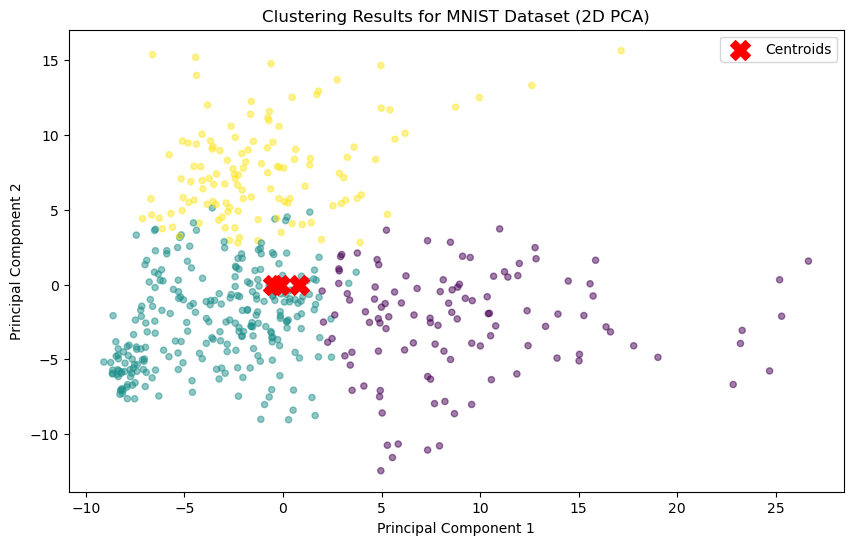

In [7]:
# Застосування PCA
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=labels_mnist, cmap='viridis', s=20, alpha=0.5)
plt.scatter(centroids_mnist[:, 0], centroids_mnist[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustering Results for MNIST Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()